![Vidi_Waterflux_Banner](https://raw.githubusercontent.com/ITC-Water-Resources/Vidi-waterflux-merch/refs/heads/main/jupyter/Vidi_Waterflux_Banner.png)
*Roelof Rietbroek, Sedigheh Karimi, Amin Shakya EGU 2025*

In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_glofas_for_point(roi, output_path):
    import cdsapi

    c = cdsapi.Client()
    # north_sea_region = [-5.0, 45.5, 15.5, 63.5,]
    # hoa = [7.0, -20.5, 60.5, 31.5,]
    start_year = 2000 #1990
    end_year = 2025 + 1 #2023
    for i in range(start_year, end_year): 
        download_name = output_path + str(i) + '.grib2' #'./glofas4_data_hoa/glofas4_hoa_' + str(i) + '.grib2'
        c.retrieve(
            'cems-glofas-historical',
            {
                'system_version': 'version_4_0',
                'hydrological_model': 'lisflood',
                'product_type': 'consolidated',
                'variable': 'river_discharge_in_the_last_24_hours',
                "hyear": str(i),
                "hmonth": [
                            "01",
                            "02",
                            "03",
                            "04",
                            "05",
                            "06",
                            "07",
                            "08",
                            "09",
                            "10",
                            "11",
                            "12"
                        ],
                'hday': [
                '01', '02', '03',
                '04', '05', '06',
                '07', '08', '09',
                '10', '11', '12',
                '13', '14', '15',
                '16', '17', '18',
                '19', '20', '21',
                '22', '23', '24',
                '25', '26', '27',
                '28', '29', '30',
                '31',
                ],
                'format': 'grib2', 
                'area': roi, 
            },
            download_name) #Rename appropriately

In [3]:
points_fn = '../data/glofasv4_discharge_locations.gpkg'

In [4]:
points_gdf = gpd.read_file(points_fn)
points_gdf

,name,endo,x,y,upstream_area,geometry
0,SETIT,0,4358,1429,6.373512e+10,POINT (37.87500 18.57500)
1,SETIT,0,4357,1429,6.367669e+10,POINT (37.82500 18.57500)
2,SETIT,0,4356,1429,6.364749e+10,POINT (37.77500 18.57500)
3,SETIT,0,4356,1430,6.347212e+10,POINT (37.77500 18.52500)
4,GULF OF ADEN/SOMALIA,0,4573,1672,1.184632e+11,POINT (48.62500 6.42500)
...,...,...,...,...,...,...
479,GOBI DESERT,2,5612,953,7.298325e+10,POINT (100.57500 42.37500)
480,TIBETAN PLATEAU,2,5382,1169,4.499326e+10,POINT (89.07500 31.57500)
481,TIBETAN PLATEAU,2,5383,1168,4.351758e+10,POINT (89.12500 31.62500)
482,TIBETAN PLATEAU,2,5383,1167,4.349128e+10,POINT (89.12500 31.67500)


In [15]:
basins_gdf = points_gdf.dissolve('name')
basins_gdf

,geometry,endo,x,y,upstream_area
name,,,,,
AMAZONAS,"MULTIPOINT (-51.02500 -0.62500, -50.97500 -0.5...",0,2583,1811,5.892086e+12
AMUR,"MULTIPOINT (140.72500 53.12500, 140.82500 53.1...",0,6419,739,1.991504e+12
ANGERMAN,"MULTIPOINT (11.82500 57.67500, 11.87500 57.675...",0,3837,647,5.119166e+10
ARCTIC OCEAN SEVERNY ISLAND,"MULTIPOINT (55.57500 71.52500, 55.62500 71.525...",0,4715,369,2.108406e+09
BACK RIVER,"MULTIPOINT (-93.97500 64.02500, -93.92500 64.0...",0,1724,520,2.400910e+11
...,...,...,...,...,...
WESTERN ARABIAN DESERT,"MULTIPOINT (36.72500 25.97500, 36.77500 25.925...",0,4335,1281,1.036502e+11
YANGTZE RIVER (CHANG JIANG),"MULTIPOINT (120.47500 32.02500, 120.57500 32.0...",0,6016,1160,1.913028e+12
YENISEI,"MULTIPOINT (83.37500 70.57500, 83.42500 70.575...",0,5270,388,2.549257e+12


In [17]:
basins_gdf.columns

Index(['geometry', 'endo', 'x', 'y', 'upstream_area'], dtype='object')

<AxesSubplot: >

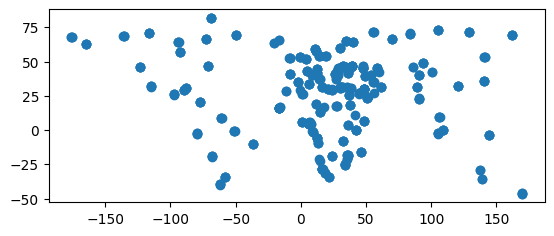

In [20]:
basins_gdf.plot()

In [25]:
basins_bounds = basins_gdf.bounds
basins_bounds

,minx,miny,maxx,maxy
name,,,,
AMAZONAS,-51.025,-0.625,-50.875,-0.525
AMUR,140.725,53.075,140.925,53.125
ANGERMAN,11.825,57.675,11.925,57.725
ARCTIC OCEAN SEVERNY ISLAND,55.575,71.525,55.725,71.575
BACK RIVER,-93.975,64.025,-93.825,64.025
...,...,...,...,...
WESTERN ARABIAN DESERT,36.725,25.925,36.825,25.975
YANGTZE RIVER (CHANG JIANG),120.475,31.975,120.775,32.025
YENISEI,83.375,70.575,83.475,70.625


In [26]:
basins_bounds.minx = basins_bounds.minx - 0.05
basins_bounds.miny = basins_bounds.miny - 0.05
basins_bounds.maxx = basins_bounds.maxx + 0.05
basins_bounds.maxy = basins_bounds.maxy + 0.05
basins_bounds

,minx,miny,maxx,maxy
name,,,,
AMAZONAS,-51.075,-0.675,-50.825,-0.475
AMUR,140.675,53.025,140.975,53.175
ANGERMAN,11.775,57.625,11.975,57.775
ARCTIC OCEAN SEVERNY ISLAND,55.525,71.475,55.775,71.625
BACK RIVER,-94.025,63.975,-93.775,64.075
...,...,...,...,...
WESTERN ARABIAN DESERT,36.675,25.875,36.875,26.025
YANGTZE RIVER (CHANG JIANG),120.425,31.925,120.825,32.075
YENISEI,83.325,70.525,83.525,70.675


In [ ]:
for i in range(len(basins_bounds)):
    basin = basins_bounds.iloc[i]
    name = basins_bounds.index[i]
    roi = [basin.maxy, basin.minx, basin.miny, basin.maxx]
    
    out_name = './basin_outlet_discharge/' + name + '_'# + '.grib2'
    get_glofas_for_point(roi, out_name)
    
    print(name + 'completed!')
    print(roi)

2025-04-17 13:35:39,078 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-04-17 13:35:39,416 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-04-17 13:35:39,418 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-04-17 13:35:39,421 INFO Request ID is 69e06651-4da1-4b85-b331-93d46d4eec51
2025-04-17 13:35:39,494 INFO status has been updated to accepted
2025-04-17 13:36:29,612 INFO status has been updated to running
2025-04-17 13:41:59,100 INFO status has been updated to successful


18d0e73c096366a5dc171d997ac332fe.grib:   0%|          | 0.00/119k [00:00<?, ?B/s]

2025-04-17 13:42:00,059 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-04-17 13:42:00,062 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-04-17 13:42:00,064 INFO Request ID is e07bbe6b-c1a2-4bb8-98f3-e6301f2815e6
2025-04-17 13:42:00,145 INFO status has been updated to accepted
2025-04-17 13:46:19,135 INFO status has been updated to running
2025-04-17 13:50:19,852 INFO status has been updated to successful


51c17c835746f3ea2302052643101efe.grib:   0%|          | 0.00/119k [00:00<?, ?B/s]

2025-04-17 13:50:21,017 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-04-17 13:50:21,020 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-04-17 13:50:21,022 INFO Request ID is e928be04-ceaa-4e18-99aa-37753ba75ff9
2025-04-17 13:50:21,417 INFO status has been updated to accepted
2025-04-17 13:54:45,721 INFO status has been updated to running
2025-04-17 13:58:46,658 INFO status has been updated to successful


fe4559e4c27009db99474308a241dc83.grib:   0%|          | 0.00/119k [00:00<?, ?B/s]

2025-04-17 13:58:48,225 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-04-17 13:58:48,227 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-04-17 13:58:48,229 INFO Request ID is 15ef0142-14c9-48cc-9d83-f6b91b58fe6b
2025-04-17 13:58:48,338 INFO status has been updated to accepted
2025-04-17 13:59:02,174 INFO status has been updated to running
2025-04-17 14:03:07,717 INFO status has been updated to successful


7ba6c309a77c5ebe1382a23668a8bd05.grib:   0%|          | 0.00/119k [00:00<?, ?B/s]

2025-04-17 14:03:08,992 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-04-17 14:03:08,994 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-04-17 14:03:08,997 INFO Request ID is 82e2a9d3-90ac-4b37-96da-6c2dd117c260
2025-04-17 14:03:09,114 INFO status has been updated to accepted
2025-04-17 14:03:22,994 INFO status has been updated to running
2025-04-17 14:07:28,348 INFO status has been updated to successful


14a0195eeb5ba3685fc9ffdd3af7e6f.grib:   0%|          | 0.00/119k [00:00<?, ?B/s]

2025-04-17 14:07:29,528 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-04-17 14:07:29,531 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-04-17 14:07:29,533 INFO Request ID is 60fd012f-3349-4df0-8ed3-71c9915978e1
2025-04-17 14:07:29,603 INFO status has been updated to accepted
2025-04-17 14:08:19,618 INFO status has been updated to running
2025-04-17 14:13:48,813 INFO status has been updated to successful


5e2735f46be8fd04e219150215eb6e5b.grib:   0%|          | 0.00/119k [00:00<?, ?B/s]

2025-04-17 14:13:50,075 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-04-17 14:13:50,077 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-04-17 14:13:50,080 INFO Request ID is d6501a8e-5770-4576-b113-0463318795a7
2025-04-17 14:13:50,138 INFO status has been updated to accepted
2025-04-17 14:14:11,576 INFO status has been updated to running
2025-04-17 14:18:09,379 INFO status has been updated to successful


906a67136e7134a54c845ddc736767be.grib:   0%|          | 0.00/119k [00:00<?, ?B/s]

2025-04-17 14:18:10,442 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-04-17 14:18:10,444 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-04-17 14:18:10,446 INFO Request ID is 363d0fed-378b-411e-9bbe-5d6c8551460f
2025-04-17 14:18:10,566 INFO status has been updated to accepted
2025-04-17 14:18:43,560 INFO status has been updated to running
2025-04-17 14:24:29,899 INFO status has been updated to successful


bf1e143a7d0aa42f1c2a16ba48335314.grib:   0%|          | 0.00/119k [00:00<?, ?B/s]

2025-04-17 14:24:31,107 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-04-17 14:24:31,110 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-04-17 14:24:31,112 INFO Request ID is 60f85aad-c124-492c-9ee3-4e8eadb1e2c0
2025-04-17 14:24:31,200 INFO status has been updated to accepted
2025-04-17 14:24:52,699 INFO status has been updated to running
